# Laporan Praktikum 1 Kelompok 5 Teori Graf (D)

| Name           | NRP        |
| ---            | ---        |
| Melvan Hapianan Allo Pongalabba | 5025241124  |
| Alfianz Risqia Ilahi Loven Kary | 5025241164  |
| Isabella Sienna Sulisthio | 5025241199 |

---

## Soal:
Jika sebuah bidak kuda diletakkan pada sebarang kotak untuk kemudian melakukan perjalanan (dengan cara pergerakan kuda) mengunjungi ke semua (8 x 8) kotak papan catur.
Jika diinginkan situasi bahwa kuda tsb dapat:
a. Mengakhiri perjalanan di sebarang kotak (open tour);
b. Mengakhiri perjalanan pada attacking square (closed tour);

Maka aplikasikan algoritma untuk menyelesaikan masalah di atas ke dalam sebuah program dengan menunjukkan rute perjalanan seperti gambar kanan bawah.

---

## Penyelesaian:

**Jelaskan per blok kode**

Penyelesaian permasalahan Knight's Tour ini dibuat dengan menggunakan Algoritma Warnsdorff yang dimodifikasi dengan elemen randomisasi untuk menghindari jalan buntu (dead-end). Algoritma ini merupakan pendekatan greedy heuristik yang selalu memilih langkah ke kotak yang memiliki jumlah langkah selanjutnya paling sedikit (minimum degree).

Pertama-tama, kita perlu mengimport beberapa library yaitu random, time, matplotlib.pyplot, dan matplotlib.patches.

random dan time: digunakan untuk logika pengacakan (tie-breaking) saat memilih langkah yang memiliki bobot sama, serta inisialisasi seed.

matplotlib: digunakan untuk memvisualisasikan papan catur dan jalur langkah kuda secara grafis.

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Init board
board = [[0]*8 for _ in range(8)]

# Gerak Kuda
gerak = [
    [-2,1], [-1,2], [1,2], [2,1],
    [2,-1], [1,-2], [-1,-2], [-2,-1]
]

Selanjutnya, kita mendefinisikan fungsi utilitas untuk mengonversi notasi papan catur (misal: "A1") menjadi koordinat array, serta fungsi validasi untuk memastikan langkah kuda tidak keluar dari papan $8 \times 8$.Fungsi chess_to_xy mengubah input string menjadi koordinat (x, y), sedangkan islegal memastikan koordinat berada dalam rentang index 0-7.

In [ ]:
# Konversi Notasi Catur ke Koordinat
def chess_to_xy(notation):
    notation = notation.strip().upper()
    if len(notation) != 2:
        raise ValueError("Format harus seperti A1..H8")
    file = notation[0]            # A–H
    rank = int(notation[1])       # 1–8
    if file < 'A' or file > 'H' or rank < 1 or rank > 8:
        raise ValueError("Notasi di luar A1..H8")
    x = ord(file) - ord('A')      # A=0, B=1
    y = rank-1                    # 1 -> 7, 8 -> 0
    return x, y

# Cek apakah koordinat legal
def islegal(x, y):
    return (0 <= x < 8 and 0 <= y < 8)

# Init board reset
def init():
    for i in range(8):
        for j in range(8):
            board[i][j] = 0

Inti dari solusi ini terletak pada fungsi degree dan next_square yang mengimplementasikan Aturan Warnsdorff.

Fungsi degree(x, y) menghitung jumlah langkah valid berikutnya dari kotak (x, y). Fungsi next_square(xy) akan memilih langkah terbaik dengan cara:

Mengecek 8 kemungkinan gerak.

Memilih gerak yang menuju kotak dengan degree terkecil (agar tidak terjebak di kemudian hari).

Jika ada beberapa kotak dengan degree yang sama, fungsi random.choice(candidates) digunakan untuk memilih salah satu secara acak.

In [ ]:
# Fungsi mengecek derajat
def degree(x, y):
    deg = 0
    for i in range(8):
        nx = x + gerak[i][0]
        ny = y + gerak[i][1]
        if islegal(nx, ny) and board[nx][ny] == 0:
            deg += 1
    return deg

# Cek apakah (x,y) menyerang (sx,sy) untuk Closed Tour
def attacks(x, y, sx, sy):
    for i in range(8):
        if x + gerak[i][0] == sx and y + gerak[i][1] == sy:
            return True
    return False

# RANDOMIZED WARNSDORFF
def next_square(xy):
    x, y = xy
    best = 9 # Derajat minimum (max degree kuda adalah 8)
    candidates = []
    count = 0

    for i in range(8):
        nx = x + gerak[i][0]
        ny = y + gerak[i][1]

        if islegal(nx, ny) and board[nx][ny] == 0:
            deg = degree(nx, ny)

            if deg < best:
                best = deg
                candidates = [(nx, ny)]
                count = 1
            elif deg == best:
                candidates.append((nx, ny))
                count += 1

    if count == 0:
        return (-1, -1)

    return random.choice(candidates)

Setelah logika penentuan langkah dibuat, dijalankan fungsi generate_tour(sx, sy) yang melakukan simulasi langkah demi langkah.

Fungsi ini menandai posisi awal (sx, sy) sebagai langkah ke-1, kemudian melakukan looping hingga langkah ke-64. Pada setiap iterasi, fungsi memanggil next_square untuk mendapatkan koordinat selanjutnya. Jika algoritma menemui jalan buntu sebelum langkah ke-64, fungsi mengembalikan False.

In [ ]:
def generate_tour(sx, sy):
    init()
    x, y = sx, sy
    board[x][y] = 1

    for step in range(2, 65):
        x, y = next_square((x, y))
        if x == -1:
            return False   # gagal, dead-end
        board[x][y] = step

    return True

Setelah tur berhasil digenerate, kita melakukan visualisasi menggunakan matplotlib. Fungsi plot_chess_knight_path akan menggambar papan catur dengan warna selang-seling dan menghubungkan setiap langkah kuda dengan garis, serta memberi nomor urut pada setiap petak yang dikunjungi.

In [ ]:
# Cetak papan console
def print_board():
    for rank in range(7, -1, -1):
        for file in range(8):
            print(f"{board[file][rank]:3d}", end="")
        print()

# Fungsi untuk menggambar rute dalam png
def plot_chess_knight_path(save_png=False, png_name="knight_tour.png"):
    fig, ax = plt.subplots(figsize=(6,6))

    for x in range(8):
        for y in range(8):
            color = '#EEEED2' if (x + y) % 2 == 0 else '#769656'
            rect = patches.Rectangle((x, y), 1, 1, facecolor=color)
            ax.add_patch(rect)

    path = [(0,0)] * 64
    for x in range(8):
        for y in range(8):
            step = board[x][y]
            if step != 0:
                path[step-1] = (x, y)

    xs = [p[0] + 0.5 for p in path]
    ys = [p[1] + 0.5 for p in path]

    ax.plot(xs, ys, marker='o', linewidth=2, markersize=6)
    for idx, (px, py) in enumerate(path, start=1):
        ax.text(px + 0.5, py + 0.5, str(idx), ha='center', va='center', fontsize=6, color='black')

    ax.set_xlim(0, 8); ax.set_ylim(0, 8)
    ax.set_xticklabels(['A','B','C','D','E','F','G','H'])
    ax.set_yticklabels(['1','2','3','4','5','6','7','8'])
    ax.set_title("Knight's Tour Path")

    if save_png:
        plt.savefig(png_name, bbox_inches='tight', dpi=200)
        print(f"Saved PNG: {png_name}")
    plt.show()

Terakhir, fungsi utama tour() menangani input pengguna untuk posisi awal dan mode (Open/Closed). Karena algoritma ini mengandung unsur random, fungsi akan melakukan loop while True untuk terus mencoba mencari solusi hingga ditemukan solusi yang sesuai dengan kriteria yang diminta (misalnya: jika meminta Closed Tour, loop akan terus berjalan sampai langkah ke-64 bisa kembali ke langkah ke-1).

In [ ]:
def tour():
    start = input("Input start (A1..H8): ")
    sx, sy = chess_to_xy(start)
    mode = int(input("Mode (1 = OPEN, 2 = CLOSED): "))

    while True:
        if not generate_tour(sx, sy):
            continue

        lx = ly = -1
        for x in range(8):
            for y in range(8):
                if board[x][y] == 64:
                    lx, ly = x, y

        closed = attacks(lx, ly, sx, sy)

        if mode == 1 and not closed:
            print("\nOPEN TOUR FOUND!\n")
            break
        if mode == 2 and closed:
            print("\nCLOSED TOUR FOUND!\n")
            break

    print_board()
    print("\n")
    plot_chess_knight_path(save_png=True, png_name="knight_tour.png")

def main():
    random.seed(int(time.time()))
    tour()

if __name__ == "__main__":
    main()

Input start (A1..H8): A1
Mode (1 = OPEN, 2 = CLOSED): 1

OPEN TOUR FOUND!

 32 17 20  9 40 61 22  7
 19 10 33 62 21  8 41 60
 16 31 18 39 64 59  6 23
 11 38 63 34 53 42 57 48
 30 15 54 43 58 47 24  5
 37 12 35 52 27 56 49 46
 14 29  2 55 44 51  4 25
  1 36 13 28  3 26 45 50


Saved PNG: knight_tour.png


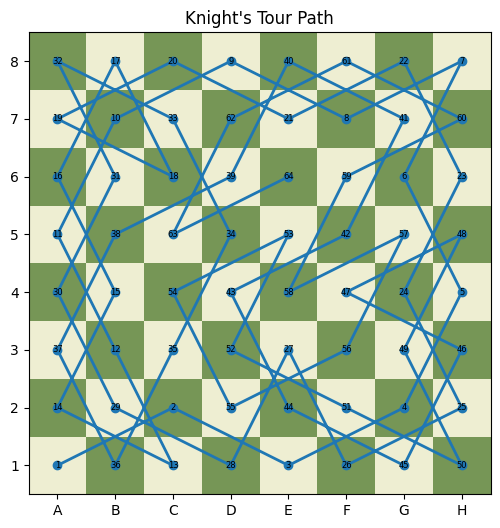

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Init board
board = [[0]*8 for _ in range(8)]

# Gerak Kuda
gerak = [
    [-2,1], [-1,2], [1,2], [2,1],
    [2,-1], [1,-2], [-1,-2], [-2,-1]
]

# Konversi Notasi Catur ke Koordinat
def chess_to_xy(notation):
    notation = notation.strip().upper()
    # Error jika format ga panjang 2 (A3/Lainnya)
    if len(notation) != 2:
        raise ValueError("Format harus seperti A1..H8")
    file = notation[0]            # A–H
    rank = int(notation[1])       # 1–8
    # Error jika Notasi bukan A-H dan 1-8
    if file < 'A' or file > 'H' or rank < 1 or rank > 8:
        raise ValueError("Notasi di luar A1..H8")
    x = ord(file) - ord('A')      # A=0, B=1
    y = rank-1                    # 1 -> 7, 8 -> 0
    return x, y

# Cek apakah koordinat legal
def islegal(x, y):
    return (0 <= x < 8 and 0 <= y < 8) # Jika diluar board maka balikin 0

# Fungsi mengecek derajat
def degree(x, y):
    deg = 0
    for i in range(8):
        nx = x + gerak[i][0] # koordinat awal + Gerak kuda
        ny = y + gerak[i][1]
        if islegal(nx, ny) and board[nx][ny] == 0: # Selama masih legal dan belum dikunjungi
            deg += 1
    return deg

# Cek apakah (x,y) menyerang (sx,sy)
def attacks(x, y, sx, sy):
    for i in range(8):
        if x + gerak[i][0] == sx and y + gerak[i][1] == sy: # Cek apakah udah closed tour apa engga
            return True
    return False

# Init board
def init():
    for i in range(8):
        for j in range(8):
            board[i][j] = 0

# RANDOMIZED WARNSDORFF
def next_square(xy):
    x, y = xy
    best = 9 # Derajat minimum
    candidates = []
    count = 0

    for i in range(8):
        nx = x + gerak[i][0]
        ny = y + gerak[i][1]

        if islegal(nx, ny) and board[nx][ny] == 0: # Selama legal dan masih belum dikunjungi
            deg = degree(nx, ny) # derajat lama = derajat baru

            if deg < best: # Kalo lebih minimal
                best = deg
                candidates = [(nx, ny)] # reset kandidat dan pilih jadi kandidat next step
                count = 1
            elif deg == best: # Kalo sama
                candidates.append((nx, ny)) # tambahkan ke calon kandidat (ada lebih dari 1 cabang)
                count += 1

    if count == 0: # Kalo ga gerak = dead end
        return (-1, -1)

    return random.choice(candidates) # pilih salah satu kandidat secara random

# Ngebuat jalannya knight
def generate_tour(sx, sy):
    init()
    x, y = sx, sy
    board[x][y] = 1

    for step in range(2, 65):
        x, y = next_square((x, y))
        if x == -1:
            return False   # gagal, dead-end
        board[x][y] = step

    return True

# Cetak papan dengan rank 8 di atas sehingga mudah dibaca:
def print_board():
    for rank in range(7, -1, -1):
        for file in range(8):
            print(f"{board[file][rank]:3d}", end="")
        print()


# Fungsi untuk menggambar rute dalam png
def plot_chess_knight_path(save_png=False, png_name="knight_tour.png"):
    fig, ax = plt.subplots(figsize=(6,6))

    # gambar kotak catur 8x8 — mulai dari (0,0) di kiri bawah
    for x in range(8):      # file A..H -> x
        for y in range(8):  # rank 1..8 -> y
            # warna papan (classic light/dark)
            color = '#EEEED2' if (x + y) % 2 == 0 else '#769656'
            rect = patches.Rectangle((x, y), 1, 1, facecolor=color)
            ax.add_patch(rect)

    # ambil path langkah dari board[x][y]
    path = [(0,0)] * 64
    for x in range(8):
        for y in range(8):
            step = board[x][y]
            if step != 0:
                # mapping langsung: board[x][y] -> (x, y)
                path[step-1] = (x, y)

    xs = [p[0] + 0.5 for p in path]  # tengah kotak
    ys = [p[1] + 0.5 for p in path]

    # gambar garis & nomor langkah kecil
    ax.plot(xs, ys, marker='o', linewidth=2, markersize=6)
    for idx, (px, py) in enumerate(path, start=1):
        ax.text(px + 0.5, py + 0.5, str(idx), ha='center', va='center', fontsize=6, color='black')

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks([i + 0.5 for i in range(8)])
    ax.set_xticklabels(['A','B','C','D','E','F','G','H'])
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['1','2','3','4','5','6','7','8'])

    ax.set_title("Knight's Tour Path")
    ax.set_aspect('equal')
    plt.grid(False)
    if save_png:
        plt.savefig(png_name, bbox_inches='tight', dpi=200)
        print(f"Saved PNG: {png_name}")
    plt.show()

def tour():
    start = input("Input start (A1..H8): ") # Input start
    sx, sy = chess_to_xy(start)

    mode = int(input("Mode (1 = OPEN, 2 = CLOSED): ")) # Input mau open/closed (open dipastikan tidak closed)

    while True:
        if not generate_tour(sx, sy):
            continue

        # posisi langkah ke-64
        lx = ly = -1
        for x in range(8):
            for y in range(8):
                if board[x][y] == 64:
                    lx, ly = x, y

        closed = attacks(lx, ly, sx, sy)

        # Jika mode == 1 dan closed, ulangi tour... jika mode == 2 dan tidak closed ulangi tour..
        if mode == 1 and not closed:
            print("\nOPEN TOUR FOUND!\n")
            break
        if mode == 2 and closed:
            print("\nCLOSED TOUR FOUND!\n")
            break

    print_board()
    print("\n")
    plot_chess_knight_path(save_png=True, png_name="knight_tour.png")

def main():
    random.seed(int(time.time()))
    tour()

if __name__ == "__main__":
    main()
